<a href="https://colab.research.google.com/github/FernandaCorlix/IA-Mapas/blob/main/VecinosMasCercanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Bajar la libreria
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#Los imports de las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sl

from collections import Counter
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.sparse.linalg.isolve.lsqr import sqrt
from urllib.request import urlretrieve
from re import I

([], <a list of 0 Text major ticklabel objects>)

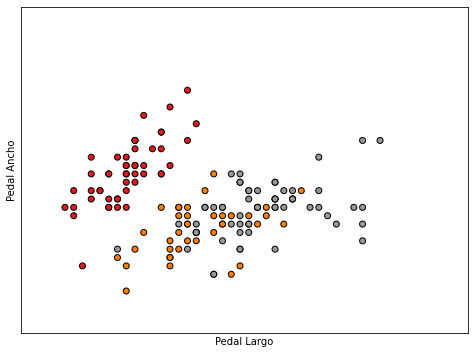

In [43]:

#Agreggamos el URL donde se encuentra el IRIS DATASET
iris = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 1

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal Largo")
plt.ylabel("Sedal Ancho")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



In [32]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#urlretrieve(iris)

df = pd.read_csv(iris, sep=',')

attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [36]:
#La clase con nuestros atributos  y sus metodos

class Knn:
  def __init__(self, k):
    self.K = k

  def adaptar(self,x, y):
    self.x_train = x
    self.y_train = y

  def prediccion(self,X):
    etiqueta_predi = [self.predic(x) for x in X]
    return np.array(etiqueta_predi)

  def predic(self,x):
    #Para calcular la distancia
    distancia = [Fdistancia(X, x_train)for x_train in self.X_train]
    #Más cercano

    #argsort = Significa índices de valor dispuestos en orden ascendente
    k_indices = np.argsort(distancia)[:self.k]
    k_cercano = [self.y_train[i]for i in k_indices]
    #Moda 
    moda = Counter(k_cercano).most_common(1)
    return moda[0][0]


 


In [38]:
#Metodo para sacar la formula de la implementacion
def Fdistancia(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

 